In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score,make_scorer

In [2]:
from collections import defaultdict
import numpy as np
from collections import Counter

In [3]:
from sklearn.model_selection import cross_val_score

In [5]:
import pandas as pd
half_life=pd.read_excel(r"C:\Users\nwntas\Downloads\pnas.1712312115.sd01.xlsx",sheet_name="S2-Modeling Results",skiprows=[0,1,2,3])

In [6]:
WT_half_lives=dict(zip(half_life["Unnamed: 0"].to_list(),map(lambda x: np.log(2)/x, half_life['alpha_WT'].to_list())))

C:\Users\nwntas\AppData\Local\Temp\ipykernel_19368\233326238.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  WT_half_lives=dict(zip(half_life["Unnamed: 0"].to_list(),map(lambda x: np.log(2)/x, half_life['alpha_WT'].to_list())))


In [30]:
import json

with open(r"C:/Users/nwntas/CDS_GC.json") as f:
    CDS_GC=json.load(f)

In [9]:
aa_freqs=dict(map(lambda x: (x[0][:-2],x[1]),aa_freqs.items()))

In [12]:
codon_score=dict(map(lambda x: (x[0][:-2],x[1]),codon_scores.items()))

In [15]:
RCBS_scores=dict(map(lambda x: (x[0][:-2],x[1]),RCBS_scores.items()))
TOP=dict(map(lambda x: (x[0][:-2],x[1]),TOP.items()))

In [23]:
MFEde_UTR3=dict(map(lambda x: (x[0][:-2],x[1]),filter(lambda x: x[0][-2:]==".1",MFEde_UTR3.items())))

In [24]:
cognate={k:v[0] if type(v)==list else np.nan for k,v in cognate.items()}

In [31]:
features={
    "CDS_L":CDS_Length,
    "UTR5_L":UTR5_Length,
    "UTR3_L":UTR3_Length,
    "CDS_GC":CDS_GC,
    "UTR5_GC":UTR5_GC,
    "UTR3_GC":UTR3_GC,
    "TOP":TOP,
    "CUB":RCBS_scores,
    "Codon_impact":codon_score,
    "amino_impact":aa_freqs,
    "MFEde_UTR3":MFEde_UTR3,
    "MFEde_UTR5":MFEde_UTR5,
    "AMFE_UTR3":AMFE_UTR3,
    "AMFE_UTR5":AMFE_UTR5,
    "cognate":cognate,
    "HL":WT_half_lives
         }

In [32]:
consensus_data=set(CDS_Length)&set(UTR5_Length)&set(UTR3_Length)&set(aa_freqs.keys())&set(codon_score)

In [33]:
import pandas as pd
df=pd.DataFrame(features)

df=df[df.index.isin(consensus_data)]

df = pd.concat([df.drop(['amino_impact',"Codon_impact"], axis=1),
                df['amino_impact'].apply(pd.Series),
                pd.json_normalize(df["Codon_impact"]).fillna(0).set_index(df.index)], axis=1)

In [35]:
df=df.replace([np.inf, -np.inf], np.nan)
df=df.dropna()

In [1]:
import json
import pandas as pd
with open(r"C:/Users/nwntas/raw_data.json") as f:
    raw=json.load(f)

In [2]:
df=pd.read_json(raw, orient ='columns')

In [3]:
df

,CDS_L,UTR5_L,UTR3_L,CDS_GC,UTR5_GC,UTR3_GC,TOP,CUB,MFEde_UTR3,MFEde_UTR5,...,Arg.AGG,Gly.GGT,Gly.GGC,Gly.GGA,Gly.GGG,Ser.TCG,Cys.TGT,Arg.CGC,Ter.TAG,Ter.TAA
AT1G08370,1104,318,296,46.648551,31.446541,34.459459,1.983390,0.150168,13.267958,15.149378,...,0.917908,1.230188,0.816543,1.516775,0.993573,0.000000,0.000000,0.000000,0.000000,0.000000
AT5G24800,834,59,128,45.563549,38.983051,33.593750,6.959397,0.166707,11.501603,14.279885,...,1.214035,0.885748,0.622624,1.844400,0.735607,0.843999,0.837839,0.521229,0.000000,0.000000
AT4G33420,978,98,283,43.456033,34.693878,32.508834,1.537467,0.124937,11.421289,3.501413,...,1.184543,1.144665,0.918542,1.720670,0.662933,0.844052,1.072764,0.700600,0.119246,0.000000
AT4G25890,360,172,246,51.944444,37.790698,36.991870,1.407177,0.323364,5.201223,16.519516,...,0.000000,1.537660,0.894312,2.062926,0.000000,0.863160,0.000000,0.000000,0.000000,0.140651
AT3G43430,504,233,223,47.420635,29.184549,22.421525,12.685518,0.181109,14.190987,24.824930,...,0.952755,0.967011,0.767313,1.403322,0.000000,0.000000,1.424726,0.700585,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT2G24395,399,58,184,44.611529,39.655172,33.695652,0.280000,0.217789,9.715479,14.002645,...,0.000000,0.000000,0.869697,1.722865,0.745446,1.015435,1.734006,0.000000,0.000000,0.124287
AT4G29780,1623,296,576,48.921750,33.783784,32.291667,1.276838,0.107607,9.510964,25.625597,...,0.812918,1.208368,0.675856,1.976899,0.748032,1.023602,1.042813,0.934160,0.075408,0.000000
AT5G17350,552,355,204,48.369565,31.549296,31.372549,1.257667,0.137023,11.456043,24.959380,...,0.998743,1.097063,0.723520,1.912914,0.699869,1.169803,1.029516,1.162946,0.000000,0.129782
AT4G12545,327,61,272,48.623853,27.868852,32.352941,0.861164,0.202147,14.263656,25.992443,...,0.950012,1.080939,0.757806,1.763441,0.882827,0.920642,1.340214,0.000000,0.000000,0.171054


In [4]:
X=df.values

In [81]:
Counter(y_train)

Counter({0: 7815, 1: 2135})

In [10]:
y=[1 if i in PB_in else 0 for i in df.index.to_list()]

In [261]:
#Random removal of samples from the dominant class
from imblearn.under_sampling import RandomUnderSampler

X_resampled, y_resampled = RandomUnderSampler().fit_resample(X_train, y_train)

In [157]:
from imblearn.over_sampling import RandomOverSampler

X_resampled, y_resampled = RandomOverSampler().fit_resample(X_train, y_train)

In [11]:
from collections import Counter
Counter(y)

Counter({1: 3024, 0: 11191})

In [46]:
Counter(y_resampled)

Counter({0: 7815, 1: 3907})

In [188]:
#Synthetic Sample generation using the Smote algorithm
from imblearn.over_sampling import SMOTE
#sampling_strategy={0: 11191, 1: int(0.70*11191)}
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [197]:
#Synthetic Sample generation using the Smote algorithm
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X, y)

In [260]:
X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=0.3,random_state=20)

In [245]:
#This is scaling for the SVM machine
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_val)

In [236]:
#This is an instance of a random forest classifier
rfc = RandomForestClassifier(n_estimators=200,random_state=20)

In [246]:
from sklearn import svm
SVM=svm.SVC(C=0.1,gamma=0.01,probability=True)

In [242]:
res=SVM.predict(X_test)

In [248]:
SVM.fit(X_train,y_resampled)

SVC(C=0.1, gamma=0.01, probability=True)

In [266]:
rf_acc_scores=cross_val_score(rfc, X_val,y_val, cv=5)

In [267]:
rf_acc_score=rf_acc_scores*100

In [268]:
rf_acc_score

array([79.24970692, 79.13247362, 79.13247362, 79.13247362, 79.24970692])

In [191]:
#test_scores_f1=defaultdict(float)
test_scores["SVM_smo"]=roc_auc_score(y_val,SVM.predict_proba(X_test)[:,1])
test_scores_f1["SVM_smo"]=f1_score(y_val,SVM.predict(X_test))

In [192]:
test_scores

defaultdict(float,
            {'RF_over': 0.6169403957799112,
             'RF_smote': 0.6029894404490909,
             'RF_under': 0.6135381625874965,
             'SVM_over': 0.5979827166153995,
             'SVM_smote': 0.610641383097255,
             'SVM_smo': 0.4793107170845351})

In [193]:
test_scores_f1

defaultdict(float,
            {'RF_under': 0.3681280445372303,
             'RF_over': 0.0132013201320132,
             'RF_smote': 0.03785488958990536,
             'SVM_over': 0.0,
             'SVM_smote': 0.35827497235532624,
             'SVM_smo': 0.0044543429844098})

In [292]:
svm_acc_scores=svm_acc_scores=cross_val_score(SVM, X_train,y_train, cv=10)

In [304]:
svm_acc_score=svm_acc_scores*100

In [296]:
%matplotlib inline

Text(0, 0.5, 'Accuracy')

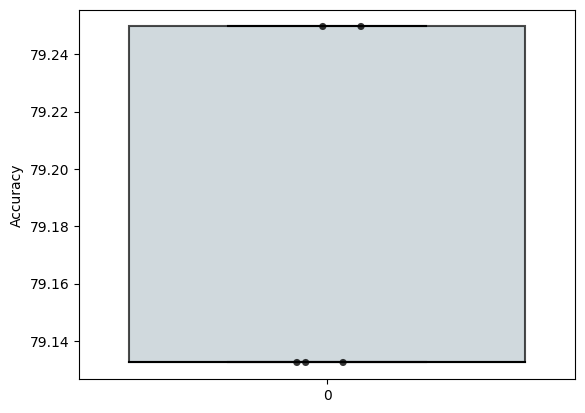

In [269]:
ax0=plt.subplots()
#sns.set_style("white")

PROPS = {
    'boxprops':{'facecolor':'#d0d9dd', 'edgecolor':(0,0,0,0.7)},
    'medianprops':{'color':'k'},
    'whiskerprops':{'color':'k'},
    'capprops':{'color':'k'}
}

ax0=sns.boxplot(data=[rf_acc_score,],showfliers=False,**PROPS)
sns.stripplot(data=[rf_acc_score,],alpha=.8,color="#020202",linewidth=0.1,dodge=True,jitter=True,size=5)

#ax0.set_xticklabels(["Random Forest", "SVM"])
ax0.set_ylabel("Accuracy")
#plt.savefig("Model_accuracy.tiff")

In [776]:
f1_score(y_train,best_SVM.predict(X_train))

1.0

In [57]:
roc_auc_score(y_val,rfc.predict_proba(X_val)[:,1])

0.6116469594144334

In [54]:
roc_auc_score(y_val,rfc.predict_proba(X_val)[:,1])

0.614450111686276

In [777]:
f1_score(y_val,best_SVM.predict(X_val))

0.06639839034205232

In [273]:
rfc.feature_importances_

array([0.02204385, 0.00974723, 0.0099414 , 0.01204958, 0.01042808,
       0.01086927, 0.01081094, 0.01179348, 0.00968418, 0.0111913 ,
       0.01050157, 0.01123056, 0.01047829, 0.01338043, 0.00951703,
       0.00970527, 0.01073282, 0.0098412 , 0.01078572, 0.01040684,
       0.00994228, 0.00943319, 0.01047263, 0.0093072 , 0.02233815,
       0.00928355, 0.0099496 , 0.01044576, 0.01050817, 0.01089245,
       0.01047134, 0.01013276, 0.00911887, 0.0106452 , 0.01051318,
       0.01042152, 0.01058188, 0.00966935, 0.01077261, 0.00977454,
       0.0094866 , 0.00904982, 0.00980594, 0.01093855, 0.01019993,
       0.00898828, 0.01039151, 0.00987965, 0.01027822, 0.01031569,
       0.00992245, 0.00973784, 0.01046703, 0.00961056, 0.00911284,
       0.00970702, 0.01041104, 0.00886793, 0.00984161, 0.00953885,
       0.01042379, 0.00911742, 0.0100053 , 0.00889116, 0.01012377,
       0.01045126, 0.00913084, 0.00973756, 0.00994195, 0.00948347,
       0.00642906, 0.00944461, 0.00963213, 0.00982335, 0.00991

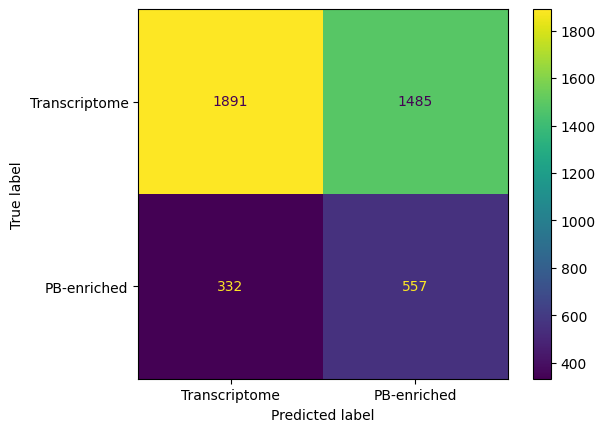

In [257]:
ConfusionMatrixDisplay(confusion_matrix(y_val,rfc.predict(X_val),labels=rfc.classes_),display_labels=["Transcriptome","PB-enriched"]).plot()
#plt.tight_layout()
plt.savefig("RF_conf.tiff")

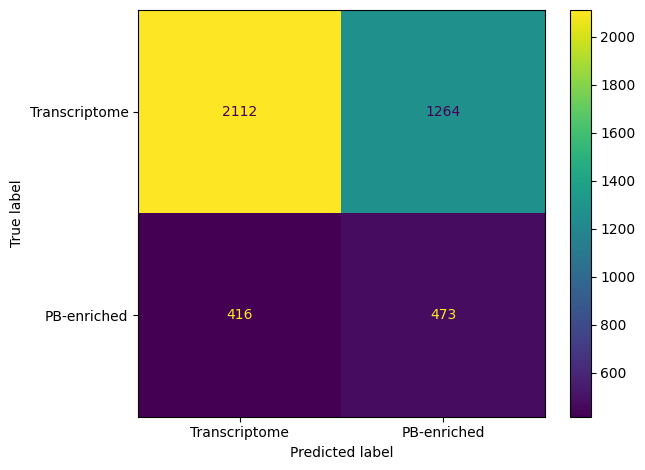

In [258]:
ConfusionMatrixDisplay(confusion_matrix(y_val,SVM.predict(X_test),labels=SVM.classes_),display_labels=["Transcriptome","PB-enriched"]).plot()
plt.tight_layout()
plt.savefig("SVM_conf.tiff")

In [402]:
fpr,tpr,thresholds=roc_curve(y_val,best_SVM.predict_proba(X_val)[:,1])
#fpr_svm,tpr_svm,thresholds=roc_curve(y_val,SVM.predict_proba(X_test)[:,1])

In [307]:
rfc.predict_proba(X_val)[:,1]

array([0.395, 0.32 , 0.42 , ..., 0.725, 0.975, 0.895])

In [564]:
from sklearn.metrics import precision_recall_curve,roc_curve
#precision,recall,_=precision_recall_curve(y_val,best_SVM.predict_proba(X_val)[:,1])
precision_svm,recall_svm,_=precision_recall_curve(y_val,best_SVM.predict_proba(X_test)[:,1])

In [23]:
from sklearn.metrics import f1_score

#f1_score(y_val,rfc.predict(X_val), average='weighted')

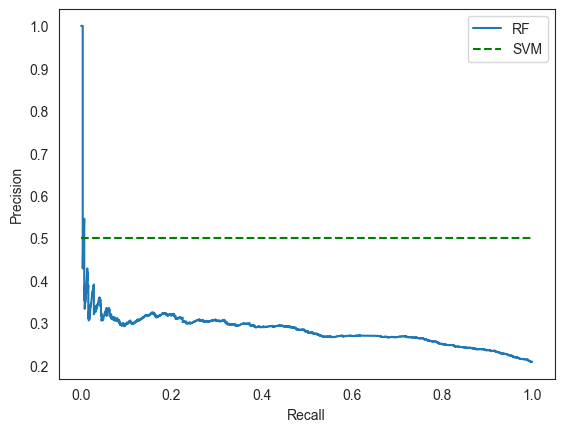

In [565]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
#ax.plot(recall,precision)
ax.plot(recall_svm,precision_svm)
ax.plot([0,1],[0.5,0.5],linestyle="--",color="green")
ax.set_ylabel("Precision")
ax.set_xlabel("Recall")
ax.legend(labels=["RF", "SVM", "Random Classifier"])
#plt.savefig("PR_cutve.tiff")

In [728]:
from sklearn.feature_selection import RFE

In [729]:
selector=RFE(estimator=rfc,n_features_to_select=15,step=5)

In [731]:
selector=selector.fit(X_resampled,y_resampled)

In [674]:
roc_auc_score(y_val,best_SVM.predict_proba(X_test)[:,1])

0.5126166841704028

In [749]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(
    estimator=rfc,
    step=10,
    cv=5,
    scoring=make_scorer(roc_auc_score),
    min_features_to_select=10,
)

In [755]:
rfecv.fit(X_resampled,y_resampled)

RFECV(cv=5,
      estimator=RandomForestClassifier(min_samples_leaf=8, min_samples_split=32,
                                       n_estimators=150, random_state=20),
      min_features_to_select=10, scoring=make_scorer(roc_auc_score), step=10)

In [768]:
X=X[:,selector.support_]

In [93]:
#Scoring parameters to use for evaluating each set of parameter combinations
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

scoring = {
    'AUC_ROC': make_scorer(roc_auc_score),
    'accuracy':make_scorer(accuracy_score),
    "f1_score":make_scorer(f1_score)
}

param_grid={
    "n_estimators":[150,200,250],
    "min_samples_split":[2,8,16,32],
    "min_samples_leaf":[1,4,8,16]
}

param_grid_1={
    "n_estimators":range(100,300),
    "min_samples_split":range(2,50),
    "min_samples_leaf":range(1,35)
}



param_grid_SVM={
    "C":[0.01,0.1,1,10],
    "gamma":[0.01,0.1,1,10],
}

#This defines the testing of my different parameters
#param_search=GridSearchCV(rfc,param_grid,scoring=scoring,refit="AUC_ROC",cv=5)
#param_search=RandomizedSearchCV(rfc,param_distributions=param_grid_1,n_iter=30,scoring=scoring,refit="AUC_ROC",cv=10,error_score='raise')

param_search=GridSearchCV(SVM,param_grid_SVM,scoring=scoring,refit="AUC_ROC",cv=5)
#This exexcutes what is defined in my param_search on my training data
param_search.fit(X_train,y_resampled)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
             refit='AUC_ROC',
             scoring={'AUC_ROC': make_scorer(roc_auc_score),
                      'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score)})

In [94]:
best_SVM=param_search.best_estimator_

In [684]:
Counter(best_SVM.predict(X_val))

Counter({0: 3593, 1: 672})

In [95]:
best_SVM

SVC(C=10, gamma=0.1, probability=True)

In [774]:
best_SVM.feature_importances_

array([0.07517274, 0.06927711, 0.06827718, 0.06636929, 0.06601777,
       0.06935048, 0.06600592, 0.07380044, 0.06245767, 0.06301276,
       0.06169081, 0.0663451 , 0.06271832, 0.06498289, 0.06452153])

In [544]:
mean_Rand={k:[param_search.cv_results_["mean_test_AUC_ROC"][n],param_search.cv_results_["std_test_AUC_ROC"][n] ]for n,k in enumerate(estimators)}

In [58]:
estimators=list(zip(param_search.cv_results_['param_min_samples_leaf'],
    param_search.cv_results_['param_min_samples_split'],
  param_search.cv_results_['param_n_estimators']))

In [78]:
estimators=list(zip(param_search.cv_results_["param_C"],
    param_search.cv_results_['param_gamma']))

In [59]:
mean_ROC={k:[param_search.cv_results_["mean_test_AUC_ROC"][n],param_search.cv_results_["std_test_AUC_ROC"][n] ]for n,k in enumerate(estimators)}

In [31]:
mean_ROC_under={k:[param_search.cv_results_["mean_test_AUC_ROC"][n],param_search.cv_results_["std_test_AUC_ROC"][n] ]for n,k in enumerate(estimators)}

In [71]:
mean_ROC_smote={k:[param_search.cv_results_["mean_test_AUC_ROC"][n],param_search.cv_results_["std_test_AUC_ROC"][n] ]for n,k in enumerate(estimators)}

In [235]:
max(mean_ROC_under.items(),key=lambda x: x[1])

((1, 2, 200), [0.576814988290398, 0.010436665084382771])

In [690]:
best_SVM.feature_importances_

array([0.13561508, 0.08188736, 0.08598078, 0.08720261, 0.0736619 ,
       0.07235974, 0.08267417, 0.09161278, 0.09467033, 0.09069865,
       0.10363661])

In [79]:
mean_ROC_SVM_under={k:[param_search.cv_results_["mean_test_AUC_ROC"][n],param_search.cv_results_["std_test_AUC_ROC"][n] ]for n,k in enumerate(estimators)}

In [89]:
mean_ROC_SVM_over={k:[param_search.cv_results_["mean_test_AUC_ROC"][n],param_search.cv_results_["std_test_AUC_ROC"][n] ]for n,k in enumerate(estimators)}

In [96]:
mean_ROC_SVM_smote={k:[param_search.cv_results_["mean_test_AUC_ROC"][n],param_search.cv_results_["std_test_AUC_ROC"][n] ]for n,k in enumerate(estimators)}

In [93]:
rf_oversampling=param_search.cv_results_

In [642]:
from collections import defaultdict

#best_models=defaultdict(list)


best_models["AUC score"]+=[max(mean_ROC_SVM_smote.values(),key=lambda x: x[0])[0]]
best_models["AUC score std"]+=[max(mean_ROC_SVM_smote.values(),key=lambda x: x[0])[1]]
best_models["Model Type"]+=["SVM"]
best_models["Sampling"]+=["SMOTE"]

In [220]:
for k,v in test_scores_f1.items():
    if "RF" in k:
        best_models["Model Type"]+=["RF"]
    elif "SVM" in k:
        best_models["Model Type"]+=["SVM"]
    if "under" in k:
        best_models["Sampling"]+=["Undersampling"]
    if "over" in k:
        best_models["Sampling"]+=["Oversampling"]
    elif "smo" in k:
        best_models["Sampling"]+=["SMOTE"]
    best_models["AUC score"]+=[v]    

In [219]:
best_models=defaultdict(list)

In [225]:
mods.iloc[4,1]="Undersampling"

In [221]:
mods=pd.DataFrame(best_models)

In [244]:
max(mean_ROC_SVM_under.items(),key=lambda x: x[1][0])

((0.1, 0.01), [0.577751756440281, 0.009027791694330831])

In [645]:
a=best_models["AUC score std"]

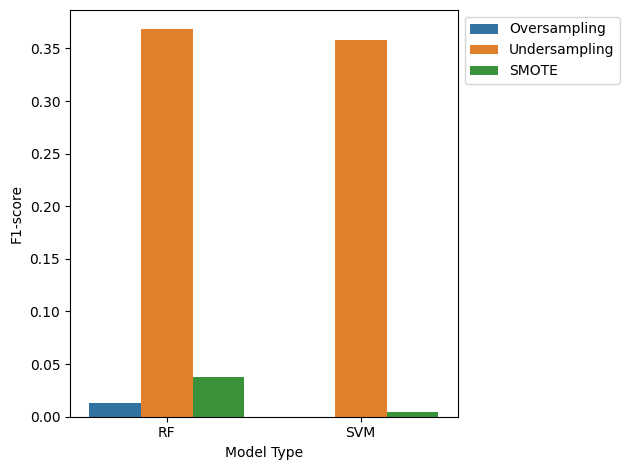

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ap=plt.subplots()

ax=sns.barplot(data=mods, x="Model Type", y="AUC score",hue="Sampling")
#x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
#y_coords = [p.get_height() for p in ax.patches]
#ax.errorbar(x=x_coords, y=y_coords, yerr=mods["AUC score std"], fmt="none", c= "k")
ax.legend(bbox_to_anchor=(1,1))
ap.set_ylabel("F1-score")
plt.tight_layout()
plt.savefig("final sampling_test_f1.tiff")

In [178]:
mods.groupby("Model Type")

In [86]:
#SVM.fit(X_train,y_train)

In [133]:
f1_score(y_val,best_model.predict(X_val))

0.7849109653233365

In [123]:
best_model=param_search.best_estimator_

#Testing the best model on my valuation deata
y_preds=best_model.predict_proba(X_val)

In [131]:
roc_auc_score(y_val,y_preds[:,1])

0.9119867092598111

In [128]:
best_model

RandomForestClassifier(n_estimators=200, random_state=20)

In [272]:
cross_val_score(rfc,X_train,y_train)

array([0.92118698, 0.91225271, 0.91892755, 0.92020428, 0.91924673])

In [6]:
df1=pd.read_excel('C:/Users/nwntas/Enriched transcripts.xlsx', skiprows=[0])

In [7]:
mock_enriched=df1[df1["Log ratio mock"]>1]["geneID"].to_list()

In [8]:
heat_enriched=df1[df1["Log ratio heat"]>1]["geneID"].to_list()

In [9]:
PB_in=set(mock_enriched).union(set(heat_enriched))

In [567]:
from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(X_train)

# Transform the data using the fitted PCA model
X_pca = pca.transform(X_test)

C:\Users\nwntas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


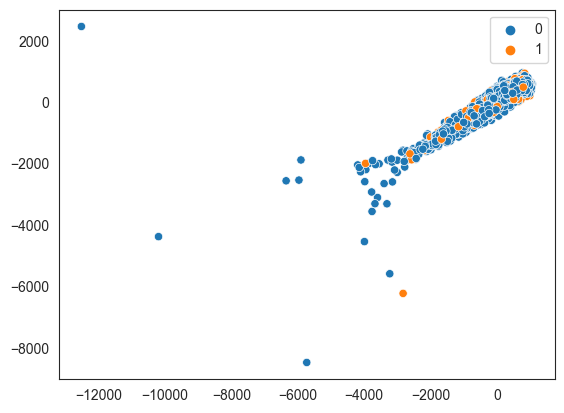

In [572]:
from sklearn.manifold import MDS

# Create a multidimensional scaling object
#mds = MDS(n_components=2)

# Fit the model on the data
#X_mds = mds.fit_transform(X_val)

# Plot the results
sns.scatterplot(X_mds[:, 0], X_mds[:, 1],hue=y_val)
plt.show()

In [388]:
import matplotlib.pyplot as plt

ValueError: All arrays must be of the same length

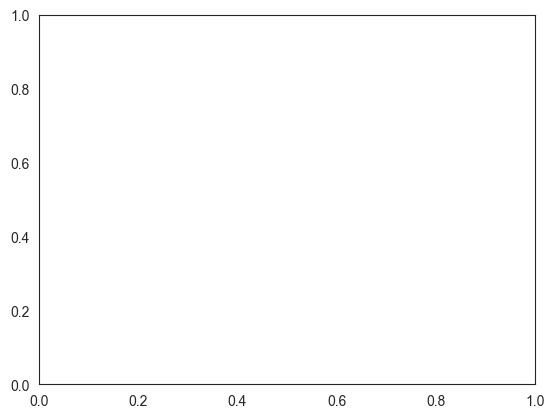

In [568]:
fig, ax=plt.subplots()
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y_resampled)
ax.set_yscale("log")
ax.set_xscale("log")

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

#conf_mat = confusion_matrix(y_val, best_model.predict(X_val))
#sns.heatmap(conf_mat, annot=True)

In [240]:
from sklearn import metrics

In [254]:
fpr,tpr,_=metrics.roc_curve(np.array(y_val).reshape(-1,1),np.argmax(arr,axis=1).reshape(-1,1))

In [251]:
fpr_svm,tpr_svm,_=metrics.roc_curve(np.array(y_val).reshape(-1,1),np.argmax(arr,axis=1).reshape(-1,1))

In [90]:
best_model.predict_proba(X_val)

array([[0.21773072, 0.78226928],
       [0.21773072, 0.78226928],
       [0.21773072, 0.78226928],
       ...,
       [0.21773072, 0.78226928],
       [0.21773072, 0.78226928],
       [0.21773072, 0.78226928]])

In [253]:
arr=rfc.predict_proba(X_val)[:]

In [76]:
Counter(np.argmax(arr,axis=1))

Counter({1: 4671})

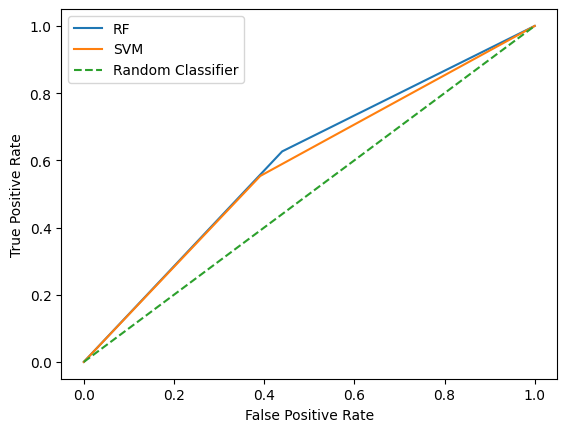

In [256]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()

ax.plot(fpr,tpr)
ax.plot(fpr_svm,tpr_svm)
ax.plot([0,1],[0,1],linestyle="--")
ax.set_ylabel("True Positive Rate")
ax.set_xlabel("False Positive Rate")
ax.legend(labels=["RF", "SVM", "Random Classifier"])
plt.savefig("ROC_curves_best.tiff")

In [341]:
important=list(map(lambda x: x[1],sorted(list(enumerate(rfc.feature_importances_)),key=lambda x: x[1],reverse=True)[1:11]))

In [342]:
index=list(map(lambda x: x[0],sorted(list(enumerate(rfc.feature_importances_)),key=lambda x: x[1],reverse=True)[1:11]))

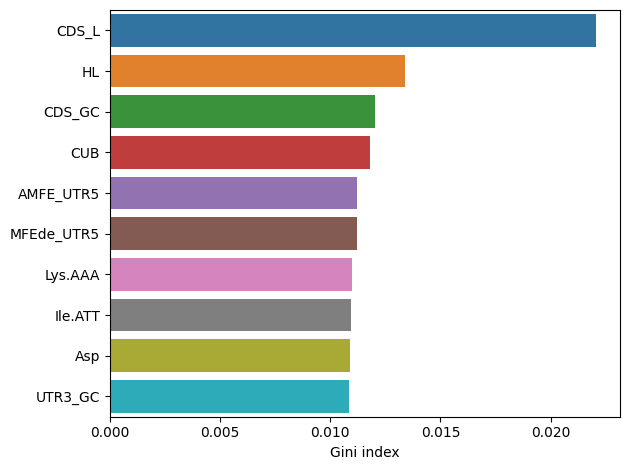

In [353]:
fig, ax=plt.subplots()
sns.barplot(y=list(map(lambda x: df.columns[x],index)),x=important,orient="h")
ax.set_xlabel("Gini index")
plt.tight_layout()
plt.savefig("feature_importance.tiff")

In [408]:
#A giid way to find the features with the greatest importance for classification in RandomForest
#The valeus basically represent the Gini Gain per feature
best_model.feature_importances_

array([1.53422909e-01, 3.17749583e-03, 1.22400526e-02, 4.93229383e-02,
       1.54700453e-03, 3.98923295e-03, 3.02485901e-04, 4.43034641e-02,
       5.90992070e-03, 2.34989344e-03, 1.16539008e-02, 2.45968367e-03,
       1.80029106e-02, 3.80076967e-03, 2.87362528e-03, 2.49756236e-02,
       6.62282489e-03, 8.68149668e-03, 7.81127831e-03, 9.48351652e-03,
       4.81116639e-03, 3.78176150e-03, 1.16150912e-02, 1.40568786e-01,
       2.27198715e-03, 6.01115852e-03, 1.01429873e-02, 8.17891830e-03,
       5.66880990e-03, 1.82800428e-03, 4.74745723e-03, 1.03533679e-02,
       6.68270215e-03, 3.76432529e-03, 1.95513594e-03, 2.83227814e-03,
       3.07801146e-03, 8.21326316e-03, 2.20279202e-03, 1.89230668e-02,
       1.96551233e-03, 1.28441728e-02, 6.23884624e-03, 2.70288913e-03,
       7.11226533e-03, 1.21485650e-04, 4.66324890e-04, 4.04025266e-03,
       1.29952108e-02, 5.14930663e-04, 2.07363303e-03, 3.95718417e-03,
       3.92895402e-03, 1.44832587e-03, 3.88509129e-03, 3.64893571e-03,
      

In [57]:
from sklearn.manifold import TSNE

In [263]:
tsne=TSNE(n_components=2).fit_transform(X_resampled)

In [257]:
indices=np.where(np.array(y)==1)
PB_i=tsne_norm[indices]

In [260]:
indices=np.where(np.array(y)==0)
PB_o=tsne_norm[indices]

C:\Users\nwntas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: >

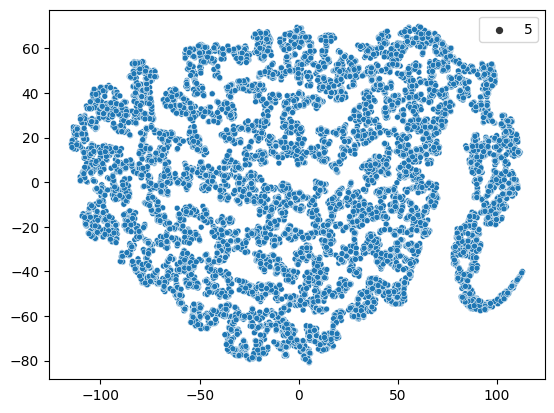

In [269]:
#sns.scatterplot(PB_i[:, 0], PB_i[:, 1],size=5)
sns.scatterplot(PB_o[:, 0], PB_o[:, 1],size=5)

In [271]:
indices=np.where(np.array(y_resampled)==1)
PB_i=tsne[indices]

C:\Users\nwntas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: >

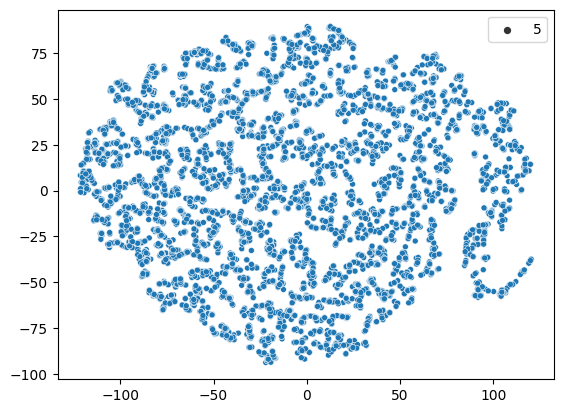

In [273]:
fig, ax=plt.subplots()

sns.scatterplot(PB_i[:,0], PB_i[:,1],size=5)

In [275]:
Counter(y_resampled)

Counter({1: 8713, 0: 12448})

In [64]:
tsne=TSNE(n_components=2).fit_transform(X_resampled)

In [65]:
indices=np.where(np.array(y_resampled)==1)
PB_i=tsne[indices]

C:\Users\nwntas\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: >

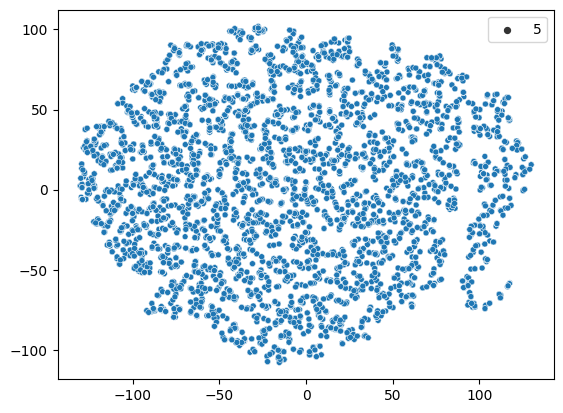

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax=plt.subplots()

sns.scatterplot(PB_i[:,0], PB_i[:,1],size=5)